# Recency Frequency Monetary Analysis :

 To identify and segment customers based on their purchasing behavior using RFM (Recency, Frequency, Monetary) analysis, in order to help the company improve customer retention, target high-value customers, and design effective marketing strategies.

#### Loading the data set

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For handeling the date attribute
import datetime as dt

# For standardize and clustering the customer segment
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# For Ignoring the warnings:
import warnings
warnings.filterwarnings('ignore')


In [2]:
import pandas as pd

df = pd.read_csv(r"C:\Users\nikhi\OneDrive\Desktop\DA_project\RFM\E-commerce data.csv", encoding='latin1')


In [3]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12-01-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12-01-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12-01-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12-01-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12-01-2010 08:26,3.39,17850.0,United Kingdom


In [4]:
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12-09-2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12-09-2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12-09-2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12-09-2011 12:50,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,12-09-2011 12:50,4.95,12680.0,France


In [5]:
df.shape

(541909, 8)

In [6]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [8]:
df.describe(include = 'all')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
count,541909,541909,540455,541909.000000,541909,541909.000000,406829.000000,541909
unique,25900,4070,4224,NaN,23260,NaN,NaN,38
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,10/31/2011 14:41,NaN,NaN,United Kingdom
freq,1114,2313,2369,NaN,1114,NaN,NaN,495478
mean,NaN,NaN,NaN,9.552250,NaN,4.611114,15287.690570,NaN
std,NaN,NaN,NaN,218.081158,NaN,96.759853,1713.600303,NaN
min,NaN,NaN,NaN,-80995.000000,NaN,-11062.060000,12346.000000,NaN
25%,NaN,NaN,NaN,1.000000,NaN,1.250000,13953.000000,NaN
50%,NaN,NaN,NaN,3.000000,NaN,2.080000,15152.000000,NaN
75%,NaN,NaN,NaN,10.000000,NaN,4.130000,16791.000000,NaN


### Which attribute requires for the RFM analysis :- 

| Column Name     | Meaning                           | Use in RFM                       |
| --------------- | --------------------------------- | -------------------------------- |
| **InvoiceNo**   | Unique invoice/transaction number | Needed (for Frequency)           |
| **StockCode**   | Product code                      | Not required for RFM             |
| **Description** | Product name                      | Not required for RFM             |
| **Quantity**    | Number of units bought            | Needed to calculate total amount |
| **InvoiceDate** | Date and time of purchase         | Needed (for Recency)             |
| **UnitPrice**   | Price per item                    | Needed (for Monetary)            |
| **CustomerID**  | Unique customer identifier        | Needed (main key for RFM)        |
| **Country**     | Country of the customer           | Optional (for further analysis)  |


In [9]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

### Handling the Missing Values of Customer ID:

We have the option to replace the null values with the mode; however, to keep our analysis accurate, we will not do so. Replacing the missing values would distort the RFM analysis by making the customer with the most frequent Customer ID appear more valuable than they actually are.

In [10]:
df = df.dropna(subset = ['CustomerID'])

In [11]:
# Checking if any null value is still left in the data or not :

print('null values still remaining in CustomerID: ', df['CustomerID'].isnull().sum())

null values still remaining in CustomerID:  0


In [12]:
# Now checking the remaining not null values 

print('remaining rows:', len(df))

remaining rows: 406829


### Detect Negative and Zero values in columns : [ Quantity & Unit price ]

As These Two attributes are required for the price(Monetary) calculation

In [13]:
print('Negative or Zero Quantity count: ', (df['Quantity'] <= 0).sum())
print('Negative or Zero Unit Price count: ', (df['UnitPrice']<= 0).sum())

Negative or Zero Quantity count:  8905
Negative or Zero Unit Price count:  40


### Data Cleaning: Removing Negative or Zero Values

* *Objective*:
Ensure that only valid sales transactions are considered for RFM analysis.

* *Reasoning*:
Quantity ≤ 0 often represents product returns, order cancellations, or data entry errors.
UnitPrice ≤ 0 may indicate free items, testing entries, or incorrect pricing.

" Since RFM (Recency, Frequency, Monetary) analysis measures customer purchasing behavior, including such records would distort the actual monetary value and lead to inaccurate insights. "

* *Action Taken*:
We will remove all rows where either Quantity ≤ 0 or UnitPrice ≤ 0 to ensure our dataset only includes successful, paid transactions that truly reflect customer activity.

In [14]:
# Remove rows where Quantity or UnitPrice are zero or negative

df=df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)]

In [15]:
# Again checking if any negative or zero remaining in Quantity or Unit price

print('Remaining Negative or Zero Quantity coun: ', (df['Quantity'] <= 0).sum())
print('Remaining Negative or Zero Unit Price count: ', (df['UnitPrice']<= 0).sum())

Remaining Negative or Zero Quantity coun:  0
Remaining Negative or Zero Unit Price count:  0


In [16]:
#Now checking for the remaining rows :- 

print('Remaining rows after removel of negative or zero from Quantity and Unit Price: ', len(df))

Remaining rows after removel of negative or zero from Quantity and Unit Price:  397884


## Handeling and  Convert InvoiceDate column into Datetime format

In [17]:
print('Current datatype of InvoiceDate is: ', df.dtypes['InvoiceDate'])

Current datatype of InvoiceDate is:  object


In [18]:
# Checking if null values avaialbe in Invoice date before datetype conversions :- 

print('Null values before conversion to date_type: ', df['InvoiceDate'].isnull().sum())

Null values before conversion to date_type:  0


In [19]:
# Check a few distinct values from InvoiceDate column as strings
df['InvoiceDate'].astype(str).unique()[:20]


array(['12-01-2010 08:26', '12-01-2010 08:28', '12-01-2010 08:34',
       '12-01-2010 08:35', '12-01-2010 08:45', '12-01-2010 09:00',
       '12-01-2010 09:01', '12-01-2010 09:02', '12-01-2010 09:09',
       '12-01-2010 09:32', '12-01-2010 09:34', '12-01-2010 09:37',
       '12-01-2010 09:41', '12-01-2010 09:45', '12-01-2010 09:53',
       '12-01-2010 09:56', '12-01-2010 09:57', '12-01-2010 09:58',
       '12-01-2010 09:59', '12-01-2010 10:03'], dtype=object)

In [20]:
# Convert InvoiceDate to datetime using correct day-first format
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], dayfirst=True, errors='coerce')

In [21]:
# Step 2: Separate Date and Time into two new columns
df['Invoice_date'] = df['InvoiceDate'].dt.date     # Only the date part
df['Time'] = df['InvoiceDate'].dt.time             # Only the time part

In [22]:
# Check again for nulls after correct conversion
print("Null values after re-conversion:", df['InvoiceDate'].isnull().sum())

Null values after re-conversion: 229253


In [23]:
# Step 1: Convert InvoiceDate to datetime (handles both '-' and '/' formats)
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], errors='coerce', dayfirst=True)

In [24]:
print('Current datatype of InvoiceDate is: ', df.dtypes['InvoiceDate'])

Current datatype of InvoiceDate is:  datetime64[ns]


In [25]:
# Step 2: Separate Date and Time into two new columns
df['Invoice_date'] = df['InvoiceDate'].dt.date     # Only the date part
df['Time'] = df['InvoiceDate'].dt.time             # Only the time part

In [26]:
print('Current datatype of Invoice_date is: ', df.dtypes['Invoice_date'])
print('Current datatype of Timee is: ', df.dtypes['Time'])

Current datatype of Invoice_date is:  object
Current datatype of Timee is:  object


* Dropping the Columns `InvoiceDate` and `Time` as we do not required them for RFM analysis :

In [27]:
# Step 3: Drop original 'InvoiceDate' and 'Time' columns as we do not required them for RFM analysis
df.drop(columns=['InvoiceDate', 'Time'], inplace=True)

In [28]:
# Step 4: Convert 'Invoice_date' column back to datetime (optional but cleaner)
df['Invoice_date'] = pd.to_datetime(df['Invoice_date'], format='%Y-%m-%d')

In [29]:
# Final Check for the invoice_date datatype after dropping both InvoiceDate and Time column: 

print('Current datatype of Invoice_date is: ', df.dtypes['Invoice_date'])


Current datatype of Invoice_date is:  datetime64[ns]


In [30]:
print("Null values after re-conversion:", df['Invoice_date'].isnull().sum())

Null values after re-conversion: 229253


In [31]:
# Step 5: Verify results
df.head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Invoice_date
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850.0,United Kingdom,2010-01-12
1,536365,71053,WHITE METAL LANTERN,6,3.39,17850.0,United Kingdom,2010-01-12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850.0,United Kingdom,2010-01-12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850.0,United Kingdom,2010-01-12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850.0,United Kingdom,2010-01-12


In [32]:
df.shape

(397884, 8)

 * Now handeling the missing values we got in our `Invoice_date` Column:

In [33]:
# Checking for the missing values in the Invoice_date column: 
df[df['Invoice_date'].isna()].head(10)

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Invoice_date
26732,538521,21754,HOME BUILDING BLOCK WORD,3,5.95,14180.0,United Kingdom,NaT
26733,538521,21755,LOVE BUILDING BLOCK WORD,3,5.95,14180.0,United Kingdom,NaT
26734,538521,22072,RED RETROSPOT TEA CUP AND SAUCER,8,3.75,14180.0,United Kingdom,NaT
26735,538521,22846,BREAD BIN DINER STYLE RED,1,16.95,14180.0,United Kingdom,NaT
26736,538521,22849,BREAD BIN DINER STYLE MINT,1,16.95,14180.0,United Kingdom,NaT
26737,538521,21527,RED RETROSPOT TRADITIONAL TEAPOT,6,7.95,14180.0,United Kingdom,NaT
26738,538521,21258,VICTORIAN SEWING BOX LARGE,2,12.75,14180.0,United Kingdom,NaT
26739,538521,22795,SWEETHEART RECIPE BOOK STAND,2,6.75,14180.0,United Kingdom,NaT
26740,538521,21218,RED SPOTTY BISCUIT TIN,6,3.75,14180.0,United Kingdom,NaT
26741,538521,21539,RED RETROSPOT BUTTER DISH,3,4.95,14180.0,United Kingdom,NaT


As observed, the Invoice_date column contains NaT (missing date) values. To maintain the accuracy and reliability of our RFM analysis, these records must be removed, as they can bias the results and affect the insights derived.

In [34]:
# Drop rows where InvoiceDate could not be parsed
df = df.dropna(subset=['Invoice_date'])

In [35]:
# Confirm cleanup
print("Remaining null values in Invoice_date:", df['Invoice_date'].isnull().sum())

Remaining null values in Invoice_date: 0


In [36]:
df.shape

(168631, 8)

### Creating the `TotalAmount` column for RFM analysis :

In [37]:
# Create TotalAmount column
df['TotalAmount'] = df['Quantity'] * df['UnitPrice']

In [38]:
# Checking for the null values in TotalAmount column
df['TotalAmount'].isnull().sum()

np.int64(0)

In [39]:
# check if there are any negative or zero values (just to confirm data quality)
print("Negative or Zero TotalAmount count:", (df['TotalAmount'] <= 0).sum())

Negative or Zero TotalAmount count: 0


In [40]:
# Check the new column
print(df['TotalAmount'].head())

0    15.30
1    20.34
2    22.00
3    20.34
4    20.34
Name: TotalAmount, dtype: float64


In [41]:
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Invoice_date,TotalAmount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850.0,United Kingdom,2010-01-12,15.30
1,536365,71053,WHITE METAL LANTERN,6,3.39,17850.0,United Kingdom,2010-01-12,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850.0,United Kingdom,2010-01-12,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850.0,United Kingdom,2010-01-12,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850.0,United Kingdom,2010-01-12,20.34
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,7.65,17850.0,United Kingdom,2010-01-12,15.30
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,4.25,17850.0,United Kingdom,2010-01-12,25.50
7,536366,22633,HAND WARMER UNION JACK,6,1.85,17850.0,United Kingdom,2010-01-12,11.10
8,536366,22632,HAND WARMER RED POLKA DOT,6,1.85,17850.0,United Kingdom,2010-01-12,11.10
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,1.69,13047.0,United Kingdom,2010-01-12,54.08


### Calculating Recency, Frequency, and Monetary (RFM) Values


In this step, we calculate the three key metrics used in RFM analysis:

- **Recency:** How recently a customer made their last purchase.  
- **Frequency:** How many times the customer made a purchase.  
- **Monetary:** How much money the customer has spent in total.

These metrics help us understand customer behavior and segment them into meaningful groups for business analysis.


In [42]:
# Step 1: Find the most recent date in the data for the `Recency`
latest_date = df['Invoice_date'].max()

print('Latest date available in the data for Recency calculation:', latest_date)


Latest date available in the data for Recency calculation: 2011-12-10 00:00:00


In [43]:
# Step 2: Group by each CustomerID and calculate R, F, and M
rfm_df = df.groupby('CustomerID').agg({
    'Invoice_date': lambda x: (latest_date - x.max()).days,  # Recency
    'InvoiceNo': 'nunique',                                 # Frequency
    'TotalAmount': 'sum'                                    # Monetary
})

In [44]:
rfm_df

,Invoice_date,InvoiceNo,TotalAmount
CustomerID,,,
12347.0,95,5,2540.29
12348.0,220,1,367.00
12350.0,311,1,334.40
12352.0,274,3,1296.38
12355.0,96,1,459.40
...,...,...,...
18280.0,160,1,180.60
18281.0,4,1,80.82
18282.0,216,2,178.05


In [45]:
# Step 3: Rename the columns for clarity
rfm_df.rename(columns={
    'Invoice_date': 'Recency',
    'InvoiceNo': 'Frequency',
    'TotalAmount': 'Monetary'
}, inplace=True)

In [46]:
print(rfm_df.columns)


Index(['Recency', 'Frequency', 'Monetary'], dtype='object')


In [47]:
# Step 4: Show the first few rows
print(rfm_df.head())

            Recency  Frequency  Monetary
CustomerID                              
12347.0          95          5   2540.29
12348.0         220          1    367.00
12350.0         311          1    334.40
12352.0         274          3   1296.38
12355.0          96          1    459.40


### Assigning RFM Scores and Creating RFM Segments


In this step, we assign R, F, and M scores to each customer using quantiles.  
- Customers are divided into 5 equal groups (1–5) for each metric.  
- **Recency:** Lower recency (more recent purchase) → higher score.  
- **Frequency & Monetary:** Higher values → higher scores.  

Then, we combine these individual scores into a single `RFM_Segment` (like 543 or 321)  
and calculate an overall `RFM_Score` to rank customers based on their value and engagement.


In [48]:
rfm_df['R_score'] = pd.qcut(rfm_df['Recency'], 5, labels = [5,4,3,2,1])
rfm_df['F_score'] = pd.qcut(rfm_df['Frequency'].rank(method = 'first'), 5, labels = [1,2,3,4,5])
rfm_df['M_score'] = pd.qcut(rfm_df['Monetary'], 5, labels = [1,2,3,4,5])

# Combine them to create a single RFM segment
rfm_df['RFM_Segment'] = rfm_df['R_score'].astype(str) + rfm_df['F_score'].astype(str) + rfm_df['M_score'].astype(str)

# Calculate RFM total score
rfm_df['RFM_score'] = rfm_df[['R_score','F_score','M_score']].astype(int).sum(axis = 1)

In [49]:
## Segment the customer on the bases of RFM_Score
def segment_customer(score):
    if score >= 12:
        return 'Best Customers'
    elif score >= 9:
        return 'Loyal Customers'
    elif score >= 6:
        return 'Potential Customers'
    elif score >= 4:
        return 'Customers At Risk'
    else:
        return 'Lost Customers'
rfm_df['Customer_Segment'] = rfm_df['RFM_score'].apply(segment_customer)

In [50]:
# Total number of customers
total_customers = rfm_df.shape[0]

# Count customers in each segment
segment_counts = rfm_df['Customer_Segment'].value_counts()

# Calculate percentage
segment_percentage = (segment_counts / total_customers) * 100

# Combine into a single DataFrame
segment_summary = pd.DataFrame({
    'Customer_Count': segment_counts,
    'Customer_Percentage (%)': segment_percentage.round(2)
})

print(segment_summary)


                     Customer_Count  Customer_Percentage (%)
Customer_Segment                                            
Potential Customers             899                    30.00
Best Customers                  823                    27.46
Loyal Customers                 736                    24.56
Customers At Risk               467                    15.58
Lost Customers                   72                     2.40


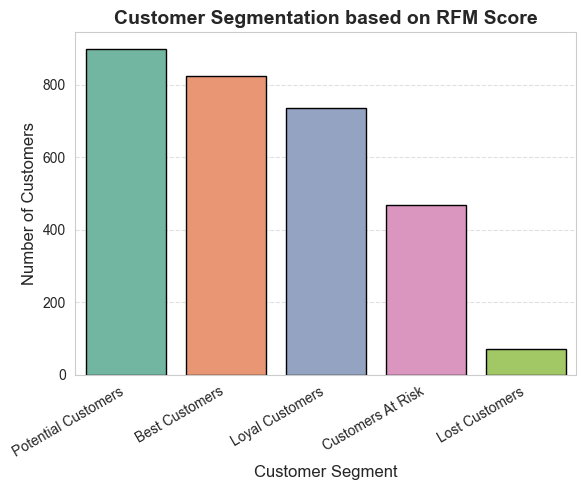

In [190]:
plt.figure(figsize=(6, 5))
sns.countplot(
    data=rfm_df,
    x='Customer_Segment',
    order=rfm_df['Customer_Segment'].value_counts().index,
    palette='Set2',
    edgecolor='black'
)

plt.title('Customer Segmentation based on RFM Score', fontsize=14, fontweight='bold')
plt.xlabel('Customer Segment', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)

# Align x-labels properly
plt.xticks(rotation=30, ha='right', fontsize=10)

# Add slight padding and grid for neatness
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()


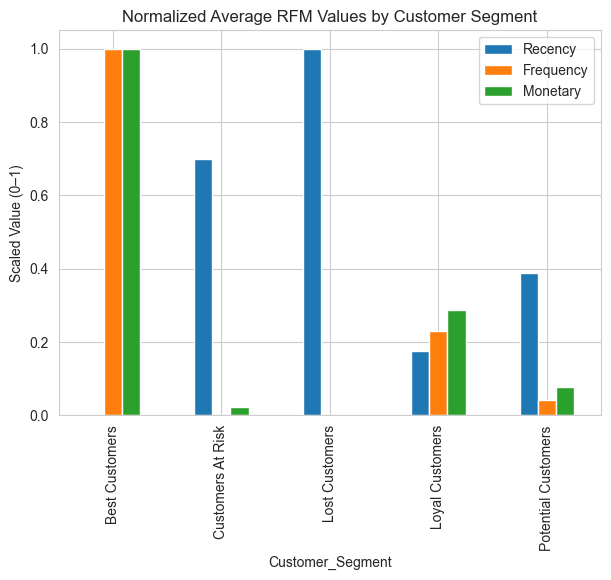

In [201]:
rfm_mean = rfm_df.groupby('Customer_Segment')[['Recency', 'Frequency', 'Monetary']].mean()
rfm_scaled = (rfm_mean - rfm_mean.min()) / (rfm_mean.max() - rfm_mean.min())

rfm_scaled.plot(kind='bar', figsize=(7,5))
plt.title('Normalized Average RFM Values by Customer Segment')
plt.ylabel('Scaled Value (0–1)')
plt.show()


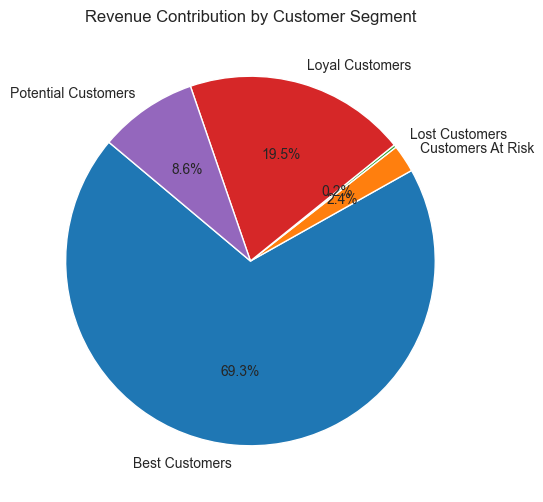

In [182]:
revenue_by_segment = rfm_df.groupby('Customer_Segment')['Monetary'].sum()
revenue_by_segment.plot(kind='pie', autopct='%1.1f%%', startangle=140, figsize=(6,6))
plt.title('Revenue Contribution by Customer Segment')
plt.ylabel('')
plt.show()
